In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

import pickle
from datetime import datetime

In [14]:
# Import the dataset to be used for the project
df = pd.read_csv('../../data/raw_data/all_genres_playlists.csv')

In [15]:
df.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13338 entries, 0 to 13337
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           13338 non-null  object 
 1   playlist_url       13338 non-null  object 
 2   playlist_name      13338 non-null  object 
 3   track_name         13338 non-null  object 
 4   track_popularity   13338 non-null  int64  
 5   artist_name        13338 non-null  object 
 6   album              13338 non-null  object 
 7   album_cover        13337 non-null  object 
 8   artist_genres      13338 non-null  object 
 9   artist_popularity  13338 non-null  int64  
 10  danceability       13338 non-null  float64
 11  energy             13338 non-null  float64
 12  key                13338 non-null  int64  
 13  loudness           13338 non-null  float64
 14  mode               13338 non-null  int64  
 15  speechiness        13338 non-null  float64
 16  acousticness       133

In [17]:
# Since there is just one missing value, we will drop the row
df.dropna(inplace=True)

In [18]:
df.describe()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,13337.000000,1.333700e+04,13337.000000
mean,49.879133,52.055485,0.596797,0.596475,5.379171,-9.642705,0.618130,0.078345,0.305396,0.175173,0.174168,0.531918,118.693463,2.515769e+05,3.917373
std,17.401469,15.623617,0.186879,0.264642,3.551822,5.942416,0.485863,0.074090,0.339879,0.317562,0.141463,0.266909,29.008030,9.361218e+04,0.358392
min,0.000000,0.000000,0.000000,0.000885,0.000000,-47.001000,0.000000,0.000000,0.000000,0.000000,0.014500,0.000000,0.000000,3.033300e+04,0.000000
25%,39.000000,43.000000,0.479000,0.434000,2.000000,-11.691000,0.000000,0.036700,0.022100,0.000000,0.089700,0.317000,96.012000,1.941200e+05,4.000000
50%,51.000000,53.000000,0.620000,0.645000,6.000000,-7.937000,1.000000,0.048100,0.149000,0.000352,0.118000,0.548000,119.287000,2.297070e+05,4.000000
75%,62.000000,63.000000,0.740000,0.809000,9.000000,-5.658000,1.000000,0.082000,0.545000,0.140000,0.214000,0.755000,134.562000,2.822870e+05,4.000000
max,98.000000,100.000000,0.984000,1.000000,11.000000,1.342000,1.000000,0.827000,0.996000,0.983000,0.984000,0.992000,217.683000,1.430840e+06,5.000000


In [19]:
# We drop the unnecessary columns for this project
df.drop(['album_cover', 'track_id', 'playlist_url', 'playlist_name'], axis=1, inplace=True)

In [20]:
# # Some of the and albums of the tracks have extra information added after a '-' or in between '()'
df['album'] = df['album'].str.split('(').str[0]
df['album'] = df['album'].str.split('-').str[0]

In [21]:
df['genre'].value_counts()

electronic    1725
pop           1251
rock          1134
country       1083
reggae        1038
blues         1034
latin         1028
hiphop        1024
disco         1016
metal         1012
jazz          1002
classical      990
Name: genre, dtype: int64

In [22]:
# We have lost some data but we have gained in accuracty 
df['genre'].value_counts()

electronic    1725
pop           1251
rock          1134
country       1083
reggae        1038
blues         1034
latin         1028
hiphop        1024
disco         1016
metal         1012
jazz          1002
classical      990
Name: genre, dtype: int64

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df["artist_encoded"] = le.fit_transform(df["artist_name"])
df["album_encoded"] = le.fit_transform(df["album"])

genre_encoded_dict = {'blues' : 1,
                 'classical' : 2,
                 'country' : 3,
                 'disco' : 4,
                 'electronic' : 5,
                 'hiphop' : 6,
                 'metal' : 7,
                 'jazz' : 8,
                 'pop' : 9,
                 'reggae' : 10,
                 'rock' : 11,
                 'latin' : 12}

df.genre = df.genre.map(genre_encoded_dict)

<AxesSubplot:xlabel='artist_popularity'>

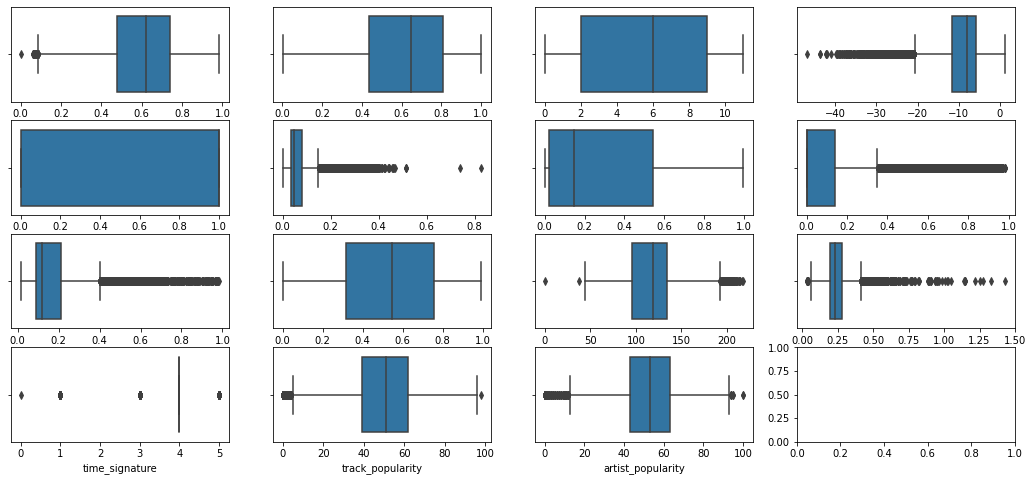

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(18, 8))
 
sns.boxplot(ax=axes[0, 0], x = df['danceability'])
sns.boxplot(ax=axes[0, 1], x = df['energy'])
sns.boxplot(ax=axes[0, 2], x = df['key'])
sns.boxplot(ax=axes[0, 3], x = df['loudness'])
sns.boxplot(ax=axes[1, 0], x = df['mode'])
sns.boxplot(ax=axes[1, 1], x = df['speechiness'])
sns.boxplot(ax=axes[1, 2], x = df['acousticness'])
sns.boxplot(ax=axes[1, 3], x = df['instrumentalness'])
sns.boxplot(ax=axes[2, 0], x = df['liveness'])
sns.boxplot(ax=axes[2, 1], x = df['valence'])
sns.boxplot(ax=axes[2, 2], x = df['tempo'])
sns.boxplot(ax=axes[2, 3], x = df['duration_ms'])
sns.boxplot(ax=axes[3, 0], x = df['time_signature'])
sns.boxplot(ax=axes[3, 1], x = df['track_popularity'])
sns.boxplot(ax=axes[3, 2], x = df['artist_popularity'])

In [25]:
df['danceability'] = winsorize(df.danceability, (0.005, 0))
df['loudness'] = winsorize(df.loudness, (0.0011, 0))
df['speechiness'] = winsorize(df.speechiness, (0, 0.123))
df['tempo'] = winsorize(df.tempo, (0.0002, 0))

<AxesSubplot:>

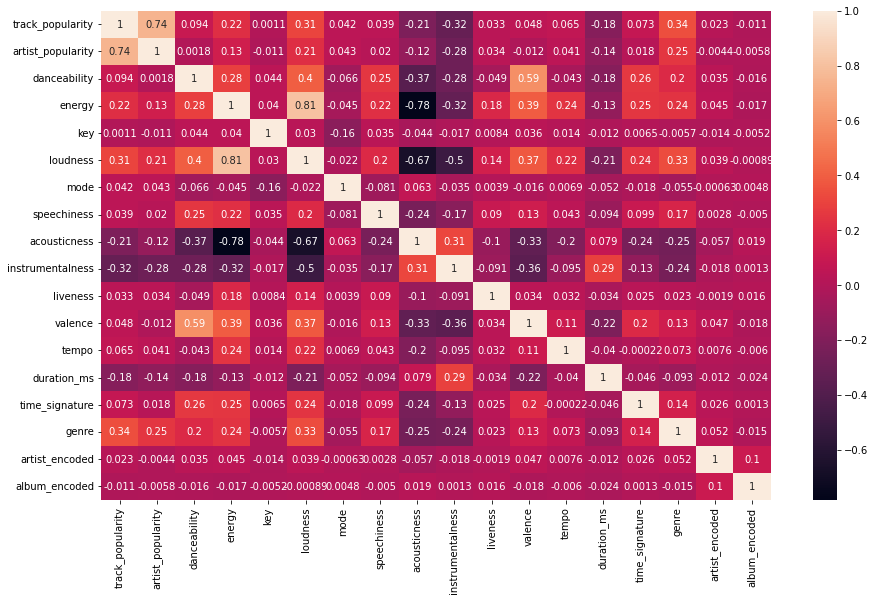

In [26]:
plt.figure(figsize =(15, 9))
sns.heatmap(df.corr(), annot=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13337 entries, 0 to 13337
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         13337 non-null  object 
 1   track_popularity   13337 non-null  int64  
 2   artist_name        13337 non-null  object 
 3   album              13337 non-null  object 
 4   artist_genres      13337 non-null  object 
 5   artist_popularity  13337 non-null  int64  
 6   danceability       13337 non-null  float64
 7   energy             13337 non-null  float64
 8   key                13337 non-null  int64  
 9   loudness           13337 non-null  float64
 10  mode               13337 non-null  int64  
 11  speechiness        13337 non-null  float64
 12  acousticness       13337 non-null  float64
 13  instrumentalness   13337 non-null  float64
 14  liveness           13337 non-null  float64
 15  valence            13337 non-null  float64
 16  tempo              133

In [28]:
df.to_csv('../../data/clean_data/clean01.csv', index=False)

In [29]:
# In order to have a equal distribution of our variables, we have applied logaritmic transformation

df['artist_popularity'] = np.log1p(df.artist_popularity)
df['track_popularity'] = np.log1p(df.track_popularity)
df['key'] = np.log1p(df.key)
df['tempo'] = np.log1p(df.tempo)
df['duration_ms'] = np.log1p(df.duration_ms)
df['time_signature'] = np.log1p(df.time_signature)
df['artist_encoded'] = np.log1p(df.artist_encoded)
df['album_encoded'] = np.log1p(df.album_encoded)

In [30]:
# Once our data has been cleaned, we will start testing different models and adjusts
# First we divide our data, we will drop some columns, like the album or the artist (encoded). 
# We have also dropped some numerical features like the time signature, the key and the mode.

X = df[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state=123)

In [31]:
# We have also applied a Min Max Scaler transformation over our features variable, in order to normalize our data

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [32]:
# We have tested Random Forest Classifier model with different params, and these are the ones that gave the best results
# We have also tested our accuracy, recall and score

rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)

rf_probs = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6660419790104948
RECALL OF THE MODEL:  0.6617027786765314
SCORE IN TEST:  0.6660419790104948
SCORE IN TRAIN:  0.9838785265723123


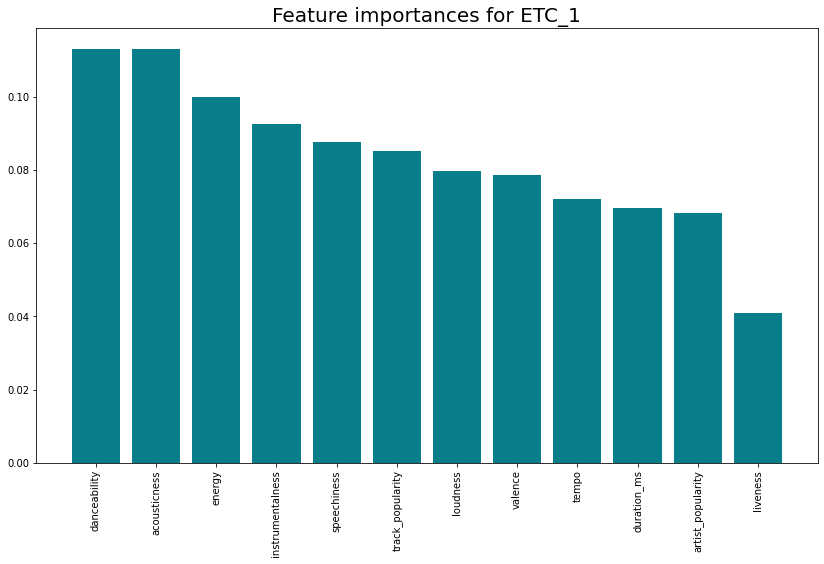

In [33]:
# In order to observe which have been the most important features, we visualize the feature importance with a plot

importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': rf.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (14,8))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances for ETC_1', size=20)
plt.xticks(rotation='vertical')
plt.show()

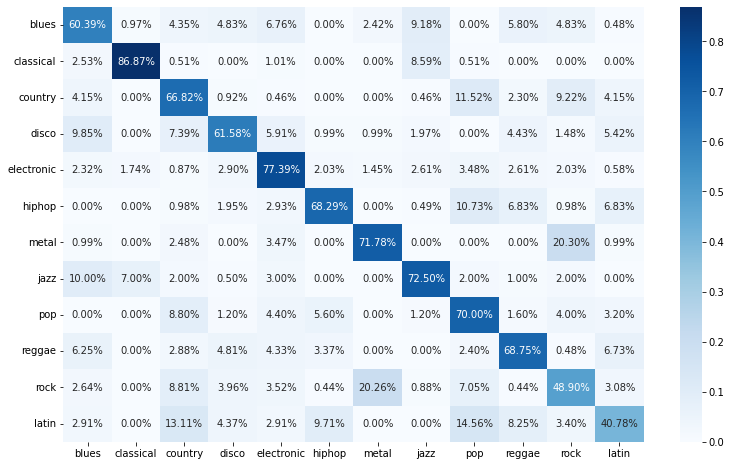

In [35]:
# From the confusion matrix we can observe that the classes which got the worst classification, have been 
# trance, techno and synthwave

x_axis_labes = ['blues', 'classical', 'country', 'disco', 'electronic', 'hiphop', 'metal', 'jazz', 'pop', 'reggae', 'rock', 'latin']
y_axis_labels = ['blues', 'classical', 'country', 'disco', 'electronic', 'hiphop', 'metal', 'jazz', 'pop', 'reggae', 'rock', 'latin']
plt.figure(figsize=(13,8))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true', labels=np.unique(y_test)), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=x_axis_labes, yticklabels=y_axis_labels);

In [36]:
# In order to try to improve our resaults, we have tested SMOTE, a random oversampler

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.20)

[(1, 1380), (2, 1380), (3, 1380), (4, 1380), (5, 1380), (6, 1380), (7, 1380), (8, 1380), (9, 1380), (10, 1380), (11, 1380), (12, 1380)]


In [37]:
# After testing with the model, our accuracy has improved a lot, but it can be also due to overfitting

rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)
# Probabilities of each genre 
rf_probs = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.7681159420289855
RECALL OF THE MODEL:  0.7699727394583095
SCORE IN TEST:  0.7681159420289855
SCORE IN TRAIN:  0.9921497584541062


In [38]:
# We will try now undersampling, since it's a safer technique, and see if we also get good resaults.

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.20)

In [39]:
# Undersampling has given us better resaults, as we can see in the accuracy

rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.7681159420289855
RECALL OF THE MODEL:  0.7685836165222942
SCORE IN TEST:  0.7681159420289855
SCORE IN TRAIN:  0.9923762077294686


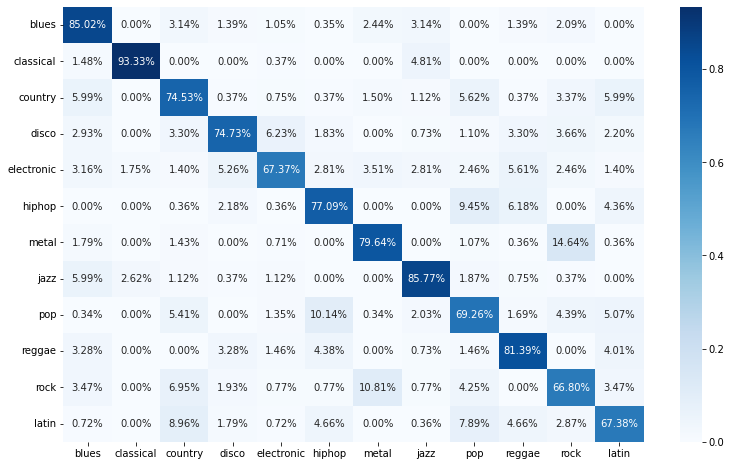

In [40]:
# From the confusion matrix we can observe that the classes which got the worst classification, have been 
# trance, techno and synthwave

x_axis_labes = ['blues', 'classical', 'country', 'disco', 'electronic', 'hiphop', 'metal', 'jazz', 'pop', 'reggae', 'rock', 'latin']
y_axis_labels = ['blues', 'classical', 'country', 'disco', 'electronic', 'hiphop', 'metal', 'jazz', 'pop', 'reggae', 'rock', 'latin']
plt.figure(figsize=(13,8))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true', labels=np.unique(y_test)), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=x_axis_labes, yticklabels=y_axis_labels);

In [41]:
# # The code below will be used to save our model into the specific folder

# filename = 'my_model'
# date = str(datetime.today().strftime('%y%m%d%H%M%S'))
# name = filename + date
# path = '../../models/' + filename
# with open(path, 'wb') as archivo_salida:
#     pickle.dump(rf, archivo_salida)